In [1]:
from imports import *
import wrangle as wr
#df = pd.read_csv('Hotel_Reviews.csv')
df = wr.wrangle_hotel()



df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 39 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   review_date                                 515738 non-null  datetime64[ns]
 1   month_name                                  515738 non-null  object        
 2   month                                       515738 non-null  int64         
 3   year                                        515738 non-null  int64         
 4   day_name                                    515738 non-null  object        
 5   day                                         515738 non-null  int64         
 6   quarter                                     515738 non-null  int64         
 7   hotel_name                                  515738 non-null  object        
 8   street                                      515738 non-null  object       

,review_date,month_name,month,year,day_name,day,quarter,hotel_name,street,city,zip_code,country,lat,lng,additional_number_of_scoring,average_score,total_number_of_reviews,reviewer_nationality,trip_type,nights_stayed,group_type,total_number_of_reviews_reviewer_has_given,reviewer_score,nps_group,days_since_review,neg_sentiment_score,neg_lem_sentiment_score,review_total_negative_word_counts,negative_unique_word_count,pos_sentiment_score,review_total_positive_word_counts,positive_unique_word_count,pos_lem_sentiment_score,negative_review,negative_clean_review,negative_lemma,positive_review,positive_clean_review,positive_lemma
0,2015-08-04,August,8,2015,Tuesday,4,3,Hilton London Metropole,225 Edgware Road Westminster Borough,London,W2 1JU,United Kingdom,51.519569,-0.170521,1485,7.5,6977,United Kingdom,leisure,2,group,4,7.5,passive,730,-0.1027,-0.1027,54,39,0.4019,8,6,0.4019,First day the swimming pool was not opened th...,first day swimming pool opened therefore could...,first day swimming pool opened therefore could...,The hotel was clean and accessible,hotel clean accessible,hotel clean accessible
1,2015-08-04,August,8,2015,Tuesday,4,3,Hotel Mademoiselle,7 Rue des Petits H tels 10th,Paris,arr 75010,France,48.877249,2.354304,125,8.6,853,United Kingdom,leisure,2,group,10,8.3,passive,730,0.0000,0.0000,0,2,0.7906,7,6,0.7906,No Negative,,,very good location breakfast was great,good location breakfast great,good location breakfast great
2,2015-08-04,August,8,2015,Tuesday,4,3,Vienna Marriott Hotel,Parkring 12a 01 Innere Stadt,Vienna,1010,Austria,48.205097,16.377093,130,8.2,939,Qatar,unknown,3,family with young children,4,10.0,promoter,730,0.0000,0.0000,2,1,0.7579,7,6,0.7579,Nothing,,,It was very nice excellent hotel,nice excellent hotel,nice excellent hotel
3,2015-08-04,August,8,2015,Tuesday,4,3,Novotel Amsterdam City,Europaboulevard 10 Zuideramstel,Amsterdam,1083 AD,Netherlands,52.333803,4.888471,341,7.8,2501,Austria,leisure,2,group,34,9.6,promoter,730,0.0000,0.0000,0,2,0.9414,27,23,0.9414,No Negative,,,Slightly out of the city center but very easy...,slightly city center easy get tram train reall...,slightly city center easy get tram train reall...
4,2015-08-04,August,8,2015,Tuesday,4,3,Hilton London Kensington Hotel,Holland Park Avenue Kensington and Chelsea,London,W11 4UL,United Kingdom,51.505108,-0.213266,843,7.8,3801,Qatar,leisure,1,solo traveler,5,7.5,passive,730,0.0000,0.0000,0,2,0.7964,6,5,0.7964,No Negative,,,Great easy to reAch location,great easy reach location,great easy reach location


In [3]:
def fill_coord_nulls(df):
    # Get median latitude and longitude for each city in df. Assign to variables.
    med_lats = df.groupby('city').lat.agg(['median'])
    med_longs = df.groupby('city').lng.agg(['median'])
    
    # Fill null values in 'lat' column with median latitude coordinate according to city by variable assignment
    amster_lats = df[(df.city == 'Amsterdam')].lat.fillna(med_lats.iloc[0][0])
    barza_lats = df[(df.city == 'Barcelona')].lat.fillna(med_lats.iloc[1][0])
    london_lats = df[(df.city == 'London')].lat.fillna(med_lats.iloc[2][0])
    milan_lats = df[(df.city == 'Milan')].lat.fillna(med_lats.iloc[3][0])
    paris_lats = df[(df.city == 'Paris')].lat.fillna(med_lats.iloc[4][0])
    vienna_lats = df[(df.city == 'Vienna')].lat.fillna(med_lats.iloc[5][0])
    
    # Reassign 'lat' column with concatenated variables to fill nulls with median latitude by city
    df.lat = pd.concat([amster_lats, barza_lats, london_lats, milan_lats, paris_lats, vienna_lats], axis=0, ignore_index=False)

    # Fill null values in 'lng' column with median longitude coordinate according to city by variable assignment
    amster_longs = df[(df.city == 'Amsterdam')].lng.fillna(med_longs.iloc[0][0])
    barza_longs = df[(df.city == 'Barcelona')].lng.fillna(med_longs.iloc[1][0])
    london_longs = df[(df.city == 'London')].lng.fillna(med_longs.iloc[2][0])
    milan_longs = df[(df.city == 'Milan')].lng.fillna(med_longs.iloc[3][0])
    paris_longs = df[(df.city == 'Paris')].lng.fillna(med_longs.iloc[4][0])
    vienna_longs = df[(df.city == 'Vienna')].lng.fillna(med_longs.iloc[5][0])

    # Reassign 'lng' column with concatenated variables to fill nulls with median longitude by city
    df.lng = pd.concat([amster_longs, barza_longs, london_longs, milan_longs, paris_longs, vienna_longs], axis=0, ignore_index=False)
    
    return df

df = fill_coord_nulls(df)
df[df.city == 'Barcelona'].sample(30)

,review_date,month_name,month,year,day_name,day,quarter,hotel_name,street,city,zip_code,country,lat,lng,additional_number_of_scoring,average_score,total_number_of_reviews,reviewer_nationality,trip_type,nights_stayed,group_type,total_number_of_reviews_reviewer_has_given,reviewer_score,nps_group,days_since_review,neg_sentiment_score,neg_lem_sentiment_score,review_total_negative_word_counts,negative_unique_word_count,pos_sentiment_score,review_total_positive_word_counts,positive_unique_word_count,pos_lem_sentiment_score,negative_review,negative_clean_review,negative_lemma,positive_review,positive_clean_review,positive_lemma
325491,2016-11-08,November,11,2016,Tuesday,8,4,Acta Atrium Palace,Gran Via Corts Catalanes 656 Eixample,Barcelona,08010,Spain,41.390913,2.170698,218,8.5,1933,United Kingdom,leisure,3,couple,2,7.9,passive,268,-0.4417,-0.4417,31,24,0.8910,23,17,0.8910,Pool was cold and sauna was off Jacuzzi was u...,pool cold sauna jacuzzi maintenance knew week ...,pool cold sauna jacuzzi maintenance knew week ...,Location was good Staff were very helpful and...,location good staff helpful friendly hotel cle...,location good staff helpful friendly hotel cle...
297421,2016-10-03,October,10,2016,Monday,3,4,Axel Hotel Barcelona Urban Spa Adults Only,Aribau 33 Eixample,Barcelona,08011,Spain,41.387348,2.160399,269,8.0,2694,United States of America,leisure,6,couple,2,10.0,promoter,304,0.0000,0.0000,4,2,0.0000,14,12,0.0000,Small elevators,small elevators,small elevator,Location architecture and the fact that there...,location architecture fact multiple private to...,location architecture fact multiple private to...
221269,2016-07-04,July,7,2016,Monday,4,3,Capri by Fraser Barcelona,Sancho de vila 32 34 Sant Mart,Barcelona,08018,Spain,41.397623,2.188975,289,8.8,2988,United Kingdom,leisure,3,family with older children,17,10.0,promoter,395,0.8957,0.8957,34,32,0.8481,24,20,0.8481,Bathroom very modern and clean but we didn t ...,bathroom modern clean like shower water comes ...,bathroom modern clean like shower water come e...,Staff very friendly We booked an apartment wi...,staff friendly booked apartment little kitchen...,staff friendly booked apartment little kitchen...
270230,2016-08-30,August,8,2016,Tuesday,30,3,Hotel DO Pla a Reial G L,Pla a Reial 1 Ciutat Vella,Barcelona,08001,Spain,41.379993,2.174826,40,9.3,252,United Kingdom,leisure,1,couple,2,9.2,promoter,338,0.8360,0.8360,49,41,0.9552,36,30,0.9552,Location is great set in beautiful square off...,location great set beautiful square ramblas re...,location great set beautiful square ramblas re...,Hotel provided lots of extras drink on arriva...,hotel provided lots extras drink arrival after...,hotel provided lot extra drink arrival afterno...
45626,2015-10-11,October,10,2015,Sunday,11,4,Col n Hotel Barcelona,Avinguda Catedral 7 Ciutat Vella,Barcelona,08002,Spain,41.384961,2.175667,170,8.9,1300,United Kingdom,leisure,3,couple,1,8.3,passive,662,0.0000,0.0000,10,9,0.0000,7,6,0.0000,no kettle in room or tea coffee making facili...,kettle room tea coffee making facilities,kettle room tea coffee making facility,location room at front with balcony,location room front balcony,location room front balcony
247597,2016-08-03,August,8,2016,Wednesday,3,3,H10 Cubik 4 Sup,V a Laietana 69 Ciutat Vella,Barcelona,08003,Spain,41.388024,2.173156,206,9.3,1398,United Kingdom,leisure,2,couple,3,10.0,promoter,365,0.0000,0.0000,9,8,0.8957,15,12,0.8957,Could have done with a few more sunbeds,could done sunbeds,could done sunbeds,The location was perfect in the Gothic quarte...,location perfect gothic quarter breakfast fab ...,location perfect gothic quarter breakfast fab ...
406374,2017-03-09,March,3,2017,Thursday,9,1,Avenida Palace,Gran Via 605 Eixample,Barcelona,08007,Spain,41.389117,2.167199,343,8.4,3222,Qatar,business,8,family with young children,2,6.3,detractor,147,0.3612,0.3612,22,17,0.4939,5,4,0.4939,Small room I paid a big amount of money for s...,small room paid big amount money small room li...,small

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 39 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   review_date                                 515738 non-null  datetime64[ns]
 1   month_name                                  515738 non-null  object        
 2   month                                       515738 non-null  int64         
 3   year                                        515738 non-null  int64         
 4   day_name                                    515738 non-null  object        
 5   day                                         515738 non-null  int64         
 6   quarter                                     515738 non-null  int64         
 7   hotel_name                                  515738 non-null  object        
 8   street                                      515738 non-null  object       

In [5]:
df.nps_group.value_counts()

promoter     247037
passive      181850
detractor     86851
Name: nps_group, dtype: int64

In [6]:
# Make a df of NPS grouping
nps_promoters = df[df.nps_group == 'promoter'].groupby('hotel_name').reviewer_score.agg(['sum']).sort_index()
nps_passives = df[df.nps_group == 'passive'].groupby('hotel_name').reviewer_score.agg(['sum']).sort_index()
nps_detractors = df[df.nps_group == 'detractor'].groupby('hotel_name').reviewer_score.agg(['sum']).sort_index()
nps_df = pd.concat([nps_promoters, nps_passives, nps_detractors], axis=1, ignore_index=False).fillna(0)
nps_df.columns = ['promoters', 'passives', 'detractors']
nps_df['score'] = ((nps_df.promoters - nps_df.detractors)/(nps_df.promoters + nps_df.passives + nps_df.detractors))*100


In [7]:
nps_df.sort_values('score', ascending=False)

,promoters,passives,detractors,score
hotel_name,,,,
Ritz Paris,266.0,0.0,6.3,95.372751
Bulgari Hotel London,339.2,7.1,6.3,94.412933
Hotel Casa Camper,2775.6,131.0,18.8,94.236686
H10 Casa Mimosa 4 Sup,1052.0,68.6,0.0,93.878279
The Soho Hotel,1421.6,73.9,11.3,93.595699
...,...,...,...,...
Kube Hotel Ice Bar,27.8,22.9,60.5,-29.406475
Villa Eugenie,74.4,105.8,183.4,-29.977998
Savoy Hotel Amsterdam,218.8,468.1,773.4,-37.978498


In [8]:
# Make a copy of the df where city == 'Barcelona'
barza_df = df.copy()[df.city == 'Barcelona']
# Make a copy of the df where city == 'Milan'
milan_df = df.copy()[df.city == 'Milan']

In [9]:
# Check
barza_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60149 entries, 20 to 515731
Data columns (total 39 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   review_date                                 60149 non-null  datetime64[ns]
 1   month_name                                  60149 non-null  object        
 2   month                                       60149 non-null  int64         
 3   year                                        60149 non-null  int64         
 4   day_name                                    60149 non-null  object        
 5   day                                         60149 non-null  int64         
 6   quarter                                     60149 non-null  int64         
 7   hotel_name                                  60149 non-null  object        
 8   street                                      60149 non-null  object        
 9   city

In [10]:
milan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37207 entries, 16 to 515732
Data columns (total 39 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   review_date                                 37207 non-null  datetime64[ns]
 1   month_name                                  37207 non-null  object        
 2   month                                       37207 non-null  int64         
 3   year                                        37207 non-null  int64         
 4   day_name                                    37207 non-null  object        
 5   day                                         37207 non-null  int64         
 6   quarter                                     37207 non-null  int64         
 7   hotel_name                                  37207 non-null  object        
 8   street                                      37207 non-null  object        
 9   city

In [11]:
barza_df.head()

,review_date,month_name,month,year,day_name,day,quarter,hotel_name,street,city,zip_code,country,lat,lng,additional_number_of_scoring,average_score,total_number_of_reviews,reviewer_nationality,trip_type,nights_stayed,group_type,total_number_of_reviews_reviewer_has_given,reviewer_score,nps_group,days_since_review,neg_sentiment_score,neg_lem_sentiment_score,review_total_negative_word_counts,negative_unique_word_count,pos_sentiment_score,review_total_positive_word_counts,positive_unique_word_count,pos_lem_sentiment_score,negative_review,negative_clean_review,negative_lemma,positive_review,positive_clean_review,positive_lemma
20,2015-08-04,August,8,2015,Tuesday,4,3,Gran Hotel Torre Catalunya,Avenida Roma 2 4 Sants Montju c,Barcelona,08014,Spain,41.379557,2.142546,215,8.5,1671,Canada,leisure,1,family with young children,1,10.0,promoter,730,-0.5267,-0.5267,54,44,0.6249,8,6,0.6249,I clearly requested before I booked online I ...,clearly requested booked online required 1 roo...,clearly requested booked online required 1 roo...,Large rooms and bathrooms Great brunch,large rooms bathrooms great brunch,large room bathroom great brunch
23,2015-08-04,August,8,2015,Tuesday,4,3,Hotel Margot House,Paseo de Gracia 46 Eixample,Barcelona,08007,Spain,41.391880,2.166036,42,9.4,335,United Kingdom,leisure,4,couple,2,10.0,promoter,730,-0.0516,-0.0516,5,3,0.8779,20,17,0.8779,Having to leave,leave,leave,Perfect location The staff were impeccable Th...,perfect location staff impeccable hotel like i...,perfect location staff impeccable hotel like i...
57,2015-08-04,August,8,2015,Tuesday,4,3,Sansi Pedralbes,Avenida Pearson 1 3 Les Corts,Barcelona,08034,Spain,41.393670,2.111542,23,8.4,274,Ireland,business,3,couple,1,8.8,passive,730,-0.1027,-0.1027,11,10,0.4939,5,4,0.4939,Hard to control temp in room too cold for sle...,hard control temp room cold sleeping,hard control temp room cold sleeping,Friendly and enthuasiatic staff,friendly enthuasiatic staff,friendly enthuasiatic staff
152,2015-08-04,August,8,2015,Tuesday,4,3,Condes de Barcelona,Paseo de Gracia 73 Eixample,Barcelona,08008,Spain,41.393550,2.162710,163,8.7,1319,Saudi Arabia,leisure,2,couple,1,6.3,detractor,730,0.8271,0.8271,84,60,0.0000,4,3,0.0000,The fridge was closed and we asked them to op...,fridge closed asked open put water said buy th...,fridge closed asked open put water said buy th...,Staff location style,staff location style,staff location style
162,2015-08-04,August,8,2015,Tuesday,4,3,Exe Laietana Palace,Via Laietana 17 Ciutat Vella,Barcelona,08003,Spain,41.383354,2.179404,177,7.9,2045,Sweden,leisure,5,couple,11,8.5,passive,730,0.0000,0.0000,31,27,0.8910,15,13,0.8910,Small crack in the toilet seat that gave smal...,small crack toilet seat gave small pinches tel...,small crack toilet seat gave small pinch tell ...,Location was great Friendly staff and one gla...,location great friendly staff one glas free ca...,location great friendly staff one glas free ca...


In [12]:
milan_df.head()

,review_date,month_name,month,year,day_name,day,quarter,hotel_name,street,city,zip_code,country,lat,lng,additional_number_of_scoring,average_score,total_number_of_reviews,reviewer_nationality,trip_type,nights_stayed,group_type,total_number_of_reviews_reviewer_has_given,reviewer_score,nps_group,days_since_review,neg_sentiment_score,neg_lem_sentiment_score,review_total_negative_word_counts,negative_unique_word_count,pos_sentiment_score,review_total_positive_word_counts,positive_unique_word_count,pos_lem_sentiment_score,negative_review,negative_clean_review,negative_lemma,positive_review,positive_clean_review,positive_lemma
16,2015-08-04,August,8,2015,Tuesday,4,3,The Yard Milano,Piazza XXIV Maggio 8 Milan City,Milan,Center 20123,Italy,45.453152,9.179172,103,9.2,786,Jordan,leisure,4,couple,39,10.0,promoter,730,0.000,0.000,0,2,0.6249,7,6,0.6249,No Negative,,,Great style indeed a boutique hotel,great style indeed boutique hotel,great style indeed boutique hotel
46,2015-08-04,August,8,2015,Tuesday,4,3,Ch teau Monfort Relais Ch teaux,Corso Concordia 1 Milan City,Milan,Center 20129,Italy,45.468236,9.207380,159,9.0,1053,Kuwait,leisure,1,couple,8,9.6,promoter,730,0.000,0.000,2,1,0.0000,2,1,0.0000,Location,location,location,Service,service,service
47,2015-08-04,August,8,2015,Tuesday,4,3,Ch teau Monfort Relais Ch teaux,Corso Concordia 1 Milan City,Milan,Center 20129,Italy,45.468236,9.207380,159,9.0,1053,Saudi Arabia,leisure,1,couple,2,8.3,passive,730,0.296,0.296,23,22,0.4215,4,3,0.4215,Bedsheets were stained with yellowish wet liq...,bedsheets stained yellowish wet liquid said cl...,bedsheets stained yellowish wet liquid said cl...,Nice luxury hotel,nice luxury hotel,nice luxury hotel
55,2015-08-04,August,8,2015,Tuesday,4,3,Hotel Michelangelo,Piazza Luigi di Savoia 6 Central,Milan,Station 20124,Italy,45.484514,9.205753,347,8.4,3510,United Kingdom,leisure,4,solo traveler,3,10.0,promoter,730,0.000,0.000,0,2,0.8720,11,9,0.8720,No Negative,,,Great location well run hotel with excellent ...,great location well run hotel excellent housek...,great location well run hotel excellent housek...
70,2015-08-04,August,8,2015,Tuesday,4,3,Hotel Berna,Via Napo Torriani 18 Central,Milan,Station 20124,Italy,45.482669,9.203437,384,9.2,4017,Denmark,leisure,3,couple,1,8.3,passive,730,0.000,0.000,11,8,0.9136,27,23,0.9136,The hotel is relatively expensive for what it...,hotel relatively expensive,hotel relatively expensive,Very warm welcome by the staff great service ...,warm welcome staff great service perfect locat...,warm welcome staff great service perfect locat...


In [13]:
barza_df.describe().T

,count,mean,std,min,25%,50%,75%,max
month,60149.0,6.576236,3.134628,1.000000,4.000000,7.000000,9.000000,12.000000
year,60149.0,2016.118689,0.690833,2015.000000,2016.000000,2016.000000,2017.000000,2017.000000
day,60149.0,15.834345,8.824521,1.000000,8.000000,16.000000,23.000000,31.000000
quarter,60149.0,2.534639,1.030259,1.000000,2.000000,3.000000,3.000000,4.000000
lat,60149.0,41.389076,0.012075,41.328376,41.383241,41.388024,41.394403,41.433756
lng,60149.0,2.169149,0.021163,2.101884,2.158493,2.169670,2.178730,2.219201
additional_number_of_scoring,60149.0,241.845268,141.155484,6.000000,129.000000,218.000000,334.000000,666.000000
average_score,60149.0,8.522812,0.476509,7.000000,8.200000,8.500000,8.800000,9.600000
total_number_of_reviews,60149.0,2311.024057,1401.640619,67.000000,1257.000000,1933.000000,3222.000000,6792.000000
total_number_of_reviews_reviewer_has_given,60149.0,7.219438,10.802235,1.000000,1.000000,3.000000,9.000000,237.000000


In [14]:
milan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
month,37207.0,6.603139,3.126127,1.000000,4.000000,7.000000,9.000000,12.000000
year,37207.0,2016.129976,0.687144,2015.000000,2016.000000,2016.000000,2017.000000,2017.000000
day,37207.0,15.748246,8.840434,1.000000,8.000000,16.000000,23.000000,31.000000
quarter,37207.0,2.552880,1.029424,1.000000,2.000000,3.000000,3.000000,4.000000
lat,37207.0,45.479617,0.021204,45.437840,45.463822,45.478736,45.485255,45.533137
lng,37207.0,9.191835,0.024135,9.068751,9.186909,9.196131,9.205421,9.257046
additional_number_of_scoring,37207.0,266.999489,216.024193,10.000000,107.000000,207.000000,353.000000,904.000000
average_score,37207.0,8.426729,0.503224,5.200000,8.100000,8.400000,8.800000,9.400000
total_number_of_reviews,37207.0,3477.530626,3714.990926,135.000000,1178.000000,2387.000000,4000.000000,16670.000000
total_number_of_reviews_reviewer_has_given,37207.0,10.059156,13.457654,1.000000,2.000000,6.000000,13.000000,250.000000


Now that the initial survey of dataset is done...

# Questions to ask

### For Hotel

- Distribution of tags/customers (how many had a pet, avg length of stay, etc)
- Scores by hotel (mean, count by bins, etc)

### For Reviewer

- Does a reviewer nationality affect the score given?
- Does the total amount of reviews affect the review score?
- Do the tags determine the reviewer score or nationality? (i.e. does certain words attract certain guests?)
- What is the distribution of the customer's home country?

### For Review

- What words are commonly associated with negative and positive reviews?
- Does the length of a review determine if it is negative or positive?
- What is the seasonality in each region? Customer Nationality? Party Size? Length of stay?


In [9]:
df.select_dtypes(include=np.number).columns

Index(['year', 'day', 'quarter', 'lat', 'lng', 'additional_number_of_scoring',
       'average_score', 'total_number_of_reviews', 'nights_stayed',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score',
       'days_since_review', 'neg_sentiment_score', 'neg_lem_sentiment_score',
       'review_total_negative_word_counts', 'negative_unique_word_count',
       'pos_sentiment_score', 'review_total_positive_word_counts',
       'positive_unique_word_count', 'pos_lem_sentiment_score'],
      dtype='object')

Distribution of tags

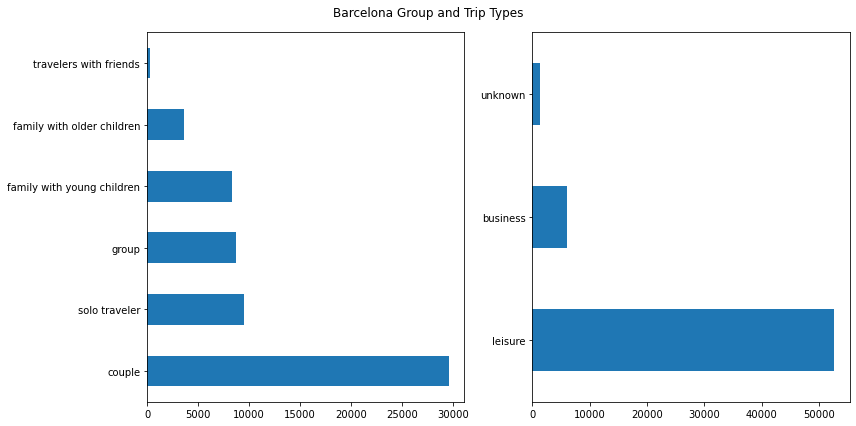

In [9]:
plt.figure(figsize=(12,6))
plt.suptitle('Barcelona Group and Trip Types')
plt.subplot(121)
barza_df.group_type.value_counts().plot.barh()

plt.subplot(122)
barza_df.trip_type.value_counts().plot.barh()

plt.tight_layout()


### Takeaways: Most guests at Barcelona hotels are couples on leisure trips

In [13]:
# Impute a '1' for nulls in nights stayed column
barza_df.nights_stayed = barza_df.nights_stayed.fillna(1)
milan_df.nights_stayed = milan_df.nights_stayed.fillna(1)
barza_df.nights_stayed = barza_df.nights_stayed.astype('float64')
milan_df.nights_stayed = milan_df.nights_stayed.astype('float64')

In [14]:
barza_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60149 entries, 2015-08-04 to 2017-08-03
Data columns (total 39 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   month_name                                  60149 non-null  object 
 1   month                                       60149 non-null  int64  
 2   year                                        60149 non-null  int64  
 3   day_name                                    60149 non-null  object 
 4   day                                         60149 non-null  int64  
 5   quarter                                     60149 non-null  int64  
 6   hotel_name                                  60149 non-null  object 
 7   street                                      60149 non-null  object 
 8   city                                        60149 non-null  object 
 9   zip_code                                    60149 non-null  object

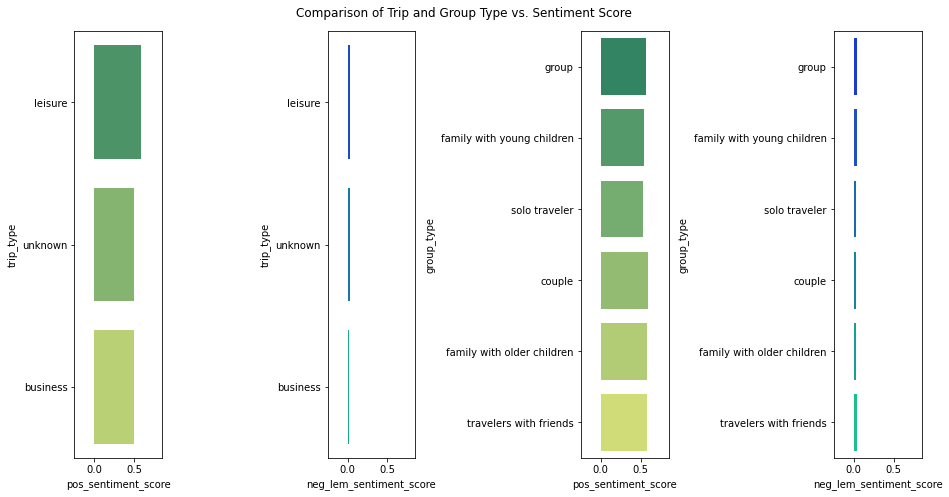

In [15]:
# Distribution of nights stayed
#plt.figure(figsize=(13,7))
#sns.displot(data=barza_df, x='nights_stayed')
#plt.show()

#Compare trip type and positive sentiment score

plt.figure(figsize=(13,7))
plt.suptitle('Comparison of Trip and Group Type vs. Sentiment Score')

plt.subplot(141)
plt.xlim(-.25, .85)
sns.barplot(data=df, y= 'trip_type', x= 'pos_sentiment_score', ci=False, palette='summer')
#plt.show()

#Compare group type and positive sentiment score
plt.subplot(143)
plt.xlim(-.25, .85)
sns.barplot(data=df, y= 'group_type', x= 'pos_sentiment_score', ci= False, palette='summer')

# Show tags (trip and group type) against negative sentiment score

plt.subplot(142)
plt.xlim(-.25, .85)
sns.barplot(data=df, y= 'trip_type', x= 'neg_lem_sentiment_score', ci=False, palette='winter')

plt.subplot(144)
plt.xlim(-.25, .85)
sns.barplot(data=df, y= 'group_type', x= 'neg_lem_sentiment_score', ci= False, palette='winter')
#plt.xticks(rotation=90)
plt.tight_layout()


### Takeaways: Meaningful trends emerge with trip type and group type rel to positive sentiment score: Solo travelers, followed by families with young children show lower positive sentiment scores; and, guests on leisure trips show higher sentiment scores than those who are not on leisure trips. 


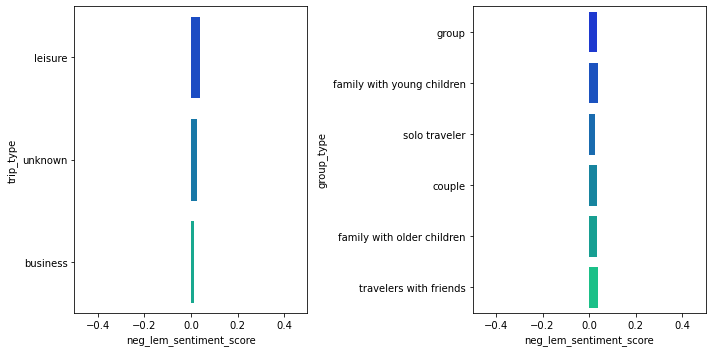

In [22]:
# Show tags (trip and group type) against negative sentiment score
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.xlim(-.5,.5)
sns.barplot(data=df, y= 'trip_type', x= 'neg_lem_sentiment_score', ci=False, palette='winter')

plt.subplot(122)
plt.xlim(-.5,.5)
sns.barplot(data=df, y= 'group_type', x= 'neg_lem_sentiment_score', ci= False, palette='winter')
#plt.xticks(rotation=90)
plt.tight_layout()

### Takeaways: Negative sentiment scores for both trip and group type are rather neutral (sentiment scores range [-1, 1])

In [12]:
barza_df.trip_type.value_counts()

leisure    52719
unknown     7430
Name: trip_type, dtype: int64

Text(0.5, 1.0, 'Avg, Min, & Max Reviewer Score')

<Figure size 1008x576 with 0 Axes>

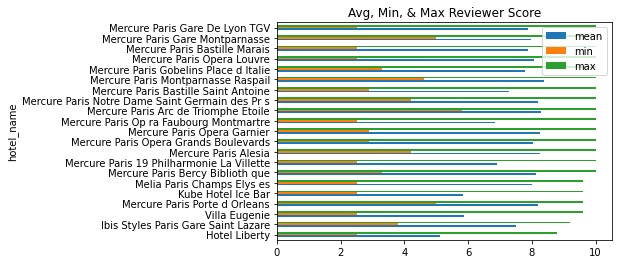

In [16]:
plt.figure(figsize=(14,8))
df.groupby('hotel_name').reviewer_score.agg(['mean', 'min', 'max']).sort_values(by='max').head(21).plot.barh()
plt.title('Avg, Min, & Max Reviewer Score')




In [17]:
len(barza_df.hotel_name.value_counts())

211

In [25]:
df.columns

Index(['additional_number_of_scoring', 'average_score', 'hotel_name',
       'reviewer_nationality', 'negative_review',
       'review_total_negative_word_counts', 'total_number_of_reviews',
       'positive_review', 'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score',
       'days_since_review', 'lat', 'lng', 'trip_type', 'nights_stayed',
       'group_type', 'month', 'year', 'day_name', 'day', 'quarter',
       'negative_unique_word_count', 'positive_unique_word_count', 'street',
       'city', 'zip_code', 'country', 'positive_clean_review',
       'negative_clean_review', 'positive_stem', 'negative_stem',
       'positive_lemma', 'negative_lemma', 'pos_sentiment_score',
       'neg_sentiment_score', 'pos_lem_sentiment_score',
       'neg_lem_sentiment_score'],
      dtype='object')

Text(0.5, 1.0, 'Hotel Guests')

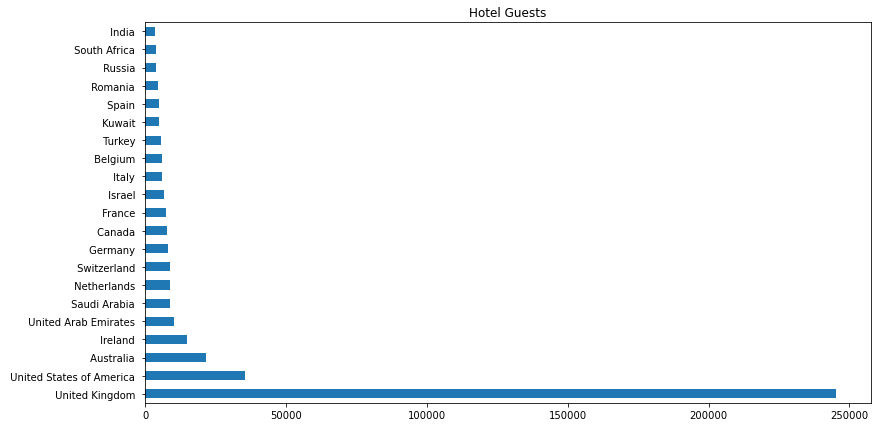

In [41]:
plt.figure(figsize=(13,7))
barza_df.reviewer_nationality.value_counts().head(21).sort_values(ascending=False).plot.bar()
plt.title('Barcelona Hotel Guests')
plt.show()

plt.figure(figsize=(13,7))
milan_df.reviewer_nationality.value_counts().head(21).sort_values(ascending=False).plot.bar()
plt.title('Milan Hotel Guests')

### Takeaway: The vast majority of hotel guests in Barcelona are from the UK, with Americans a distant second (3-to-1). In Milan, UK is still the majority of hotel guests, but the ratio between it and Americans, again in 2nd place, is 2-to-1.

Does a reviewer's nationality affect the score given?

In [29]:
# Viewer reviewer score grouped by reviewer nationality
barza_df.groupby('reviewer_nationality').reviewer_score.agg(['min', 'max', 'mean']).sort_values('mean', ascending=False).T

reviewer_nationality,Saint Martin,Suriname,Nicaragua,Cambodia,Somalia,Kosovo,Dominica,Yemen,Congo,Saint Kitts and Nevis,British Virgin Islands,Reunion,Vanuatu,Guam,Liechtenstein,Kyrgyzstan,Dominican Republic,St Maarten,Ghana,Cura ao,Barbados,Uruguay,Bahamas,Bermuda,United States of America,Trinidad and Tobago,Mongolia,New Zealand,Moldova,Honduras,Mauritius,Ecuador,Panama,Puerto Rico,Israel,Saint Lucia,Australia,Zimbabwe,Isle of Man,New Caledonia,Cayman Islands,Tajikistan,Colombia,China,United Kingdom,Peru,Botswana,Cyprus,Canada,Philippines,Chile,Kenya,Cameroon,Ireland,Tunisia,South Korea,Argentina,Macedonia,Jersey,Bulgaria,Indonesia,South Africa,Brazil,Hungary,Morocco,Guatemala,Costa Rica,Iraq,Abkhazia Georgia,Malta,Venezuela,Iceland,Guernsey,Estonia,Gibraltar,Taiwan,Nigeria,Ukraine,Belarus,Slovakia,Oman,Serbia,Libya,Singapore,Greece,Kazakhstan,Slovenia,Myanmar,Zambia,Belgium,Russia,U S Virgin Islands,Spain,Poland,Czech Republic,Malaysia,Norway,Lithuania,Sudan,Lebanon,Aruba,Egypt,Thailand,Netherlands,Austria,Italy,Tanzania,Japan,Finland,Sri Lanka,Albania,United States Minor Outlying Islands,Palestinian Territory,Brunei,Romania,Switzerland,Kuwait,,Germany,Hong Kong,Croatia,Sweden,France,Turkey,Malawi,United Arab Emirates,Armenia,India,Syria,Bahrain,Denmark,Saudi Arabia,Luxembourg,Uzbekistan,Latvia,Qatar,Mexico,Angola,Vietnam,Bosnia and Herzegovina,Pakistan,Portugal,Faroe Islands,Iran,Georgia,Macau,Monaco,Namibia,Rwanda,Swaziland,Fiji,Azerbaijan,Jordan,El Salvador,Algeria,Democratic Republic of the Congo,Senegal,Antigua Barbuda,Uganda,Bangladesh,Andorra,Mozambique,Turks Caicos Islands,Ivory Coast,Saint Barts,Lesotho,Guyana,Jamaica,Montenegro,Seychelles,Maldives,Afghanistan,Bolivia,Samoa,Mauritania,Ethiopia,Northern Mariana Islands,Cook Islands,Haiti,Nepal
min,10.0,10.0,10.0,10.0,10.0,10.0,9.2,9.2,9.6,9.6,9.6,9.6,9.2,9.2,9.4,7.9,7.500000,9.2,5.400000,7.500000,8.30,7.50,7.50,6.700,2.500000,7.100000,7.5,2.50000,7.100000,6.30,5.800000,6.300000,6.300000,2.50000,2.500000,8.8,2.500000,8.300000,6.300000,7.50,7.50,7.50,2.90000,2.50000,2.500000,5.000000,6.7,4.200000,2.500000,3.800000,3.800,5.800000,7.100000,2.500000,5.000000,2.500000,4.200000,3.300000,5.400000,2.90000,4.200000,2.500000,3.300000,2.500000,4.600000,4.200000,5.400,3.800000,4.200,3.300000,3.800000,2.500000,3.800,3.800000,4.200000,3.300000,2.500000,2.500000,4.600,5.800000,3.300000,2.500000,5.000000,2.50000,2.900000,3.800000,3.30000,4.20,7.10,2.900000,2.500000,6.700000,2.500000,2.500000,3.300000,3.300000,2.500000,2.500000,2.900000,2.500000,7.50,2.500000,3.800000,2.500000,2.900000,2.500000,7.10,2.500,2.500000,2.50,3.800000,5.000000,5.800000,7.90,2.500000,2.500000,2.500000,4.600000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,6.30,2.500000,4.200000,2.500000,3.8,2.500000,2.500000,2.500000,2.500000,7.100000,2.500000,2.500000,2.900000,5.80,3.30000,4.600000,3.300000,2.500000,6.700000,2.500000,2.5000,4.20,4.200000,7.9,7.9,7.5,7.9,3.800000,2.500000,5.400000,2.500000,5.800000,6.70,7.5,5.4,3.800,3.800000,4.200000,5.000000,6.30,7.5,7.5,7.5,5.40,2.90000,5.800,2.50,5.4,3.800,6.7,6.3,2.50,5.8,5.0,4.6,3.8
max,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.6,9.6,9.6,9.6,10.0,10.0,9.4,10.0,10.000000,9.2,10.000000,10.000000,10.00,10.00,10.00,10.000,10.000000,10.000000,10.0,10.00000,10.000000,10.00,10.000000,10.000000,10.000000,10.00000,10.000000,8.8,10.000000,9.200000,10.000000,10.00,10.00,10.00,10.00000,10.00000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000,10.000000,10.000,10.000000,10.000000,10.000000,10.000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.00000,10.00,9.20,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00,10.000000,10.000000,10.000000,10.000000,10.000000,9.60,1

<AxesSubplot:ylabel='Frequency'>

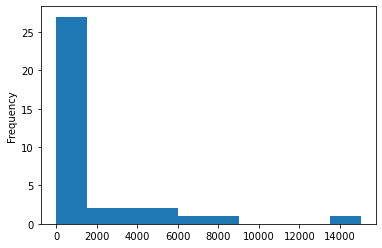

In [17]:
barza_df.reviewer_score.value_counts().plot.hist()

Observation: It appears that a probably not insignificant number of countries are represented by two or less guests, given the above aggregation of minimum, maximum, mean, and median reviewer scores.

In [27]:
print(barza_df.groupby('reviewer_nationality').total_number_of_reviews.count())

print(len(barza_df.groupby('reviewer_nationality').total_number_of_reviews.count()))

reviewer_nationality
                                             57
 Abkhazia Georgia                            25
 Afghanistan                                  3
 Albania                                     30
 Algeria                                     32
 Andorra                                     38
 Angola                                      10
 Antigua Barbuda                              2
 Argentina                                   85
 Armenia                                     18
 Aruba                                        5
 Australia                                 2907
 Austria                                    293
 Azerbaijan                                  31
 Bahamas                                      6
 Bahrain                                    183
 Bangladesh                                  20
 Barbados                                     4
 Belarus                                     40
 Belgium                                    750
 Bermuda           

$H_0:$ There is no relationship between the total number of reviews and average review score.

$H_a:$ There is a relationship between the total number of reviews and average review score.

The correlation coefficient for this test was -0.321 and its p-value is 0.000000000000.


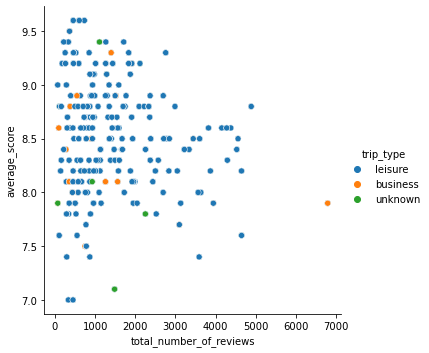

In [21]:
alpha = .05
r_coeff, pval = stats.pearsonr(x=barza_df.total_number_of_reviews, y=barza_df.average_score)
print(f'The correlation coefficient for this test was {r_coeff:.3f} and its p-value is {pval:.12f}.')

sns.relplot(data=barza_df, x='total_number_of_reviews', y='average_score', hue='trip_type')

### Correlation testing for a link between total number of reviews and average scores found a statistically significant, weak, negative correlation between the variables.

$H_0:$ There is no relationship between the number of nights stayed and average review score.

$H_a:$ There is a relationship between the number of nights stayed and average review score.

The correlation coefficient for this test was 0.009 and its p-value is 0.023167983472.


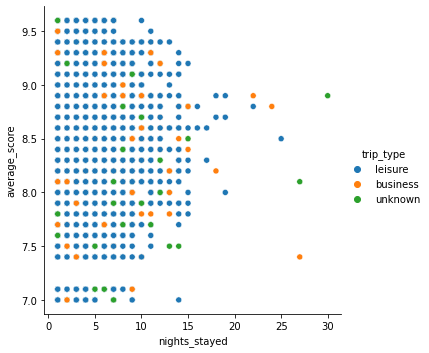

In [22]:
r_coeff, pval = stats.pearsonr(x=barza_df[barza_df.nights_stayed.notna()].nights_stayed, y=barza_df[barza_df.nights_stayed.notna()].average_score)
print(f'The correlation coefficient for this test was {r_coeff:.3f} and its p-value is {pval:.12f}.')

sns.relplot(data=barza_df, x='nights_stayed', y='average_score', hue='trip_type')

### There is virtually no correlation (0.009) between nights stayed and average score.

In [19]:
barza_df.columns

Index(['review_date', 'month_name', 'month', 'year', 'day_name', 'day',
       'quarter', 'hotel_name', 'street', 'city', 'zip_code', 'country', 'lat',
       'lng', 'additional_number_of_scoring', 'average_score',
       'total_number_of_reviews', 'reviewer_nationality', 'trip_type',
       'nights_stayed', 'group_type',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score',
       'nps_group', 'days_since_review', 'neg_sentiment_score',
       'neg_lem_sentiment_score', 'review_total_negative_word_counts',
       'negative_unique_word_count', 'pos_sentiment_score',
       'review_total_positive_word_counts', 'positive_unique_word_count',
       'pos_lem_sentiment_score', 'negative_review', 'negative_clean_review',
       'negative_lemma', 'positive_review', 'positive_clean_review',
       'positive_lemma'],
      dtype='object')

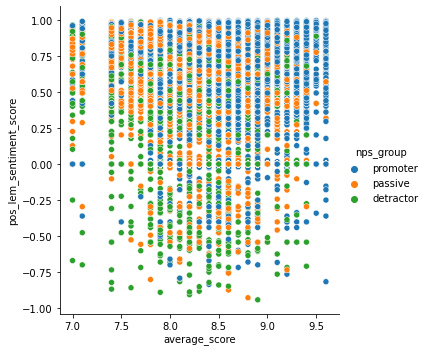

In [18]:
sns.relplot(data= barza_df, x= 'average_score', y='pos_lem_sentiment_score', hue= 'nps_group')

In [ ]:
barza_df = barza_df.set_index('review_date')



(array([16709., 16801., 16892., 16983., 17075., 17167., 17257., 17348.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

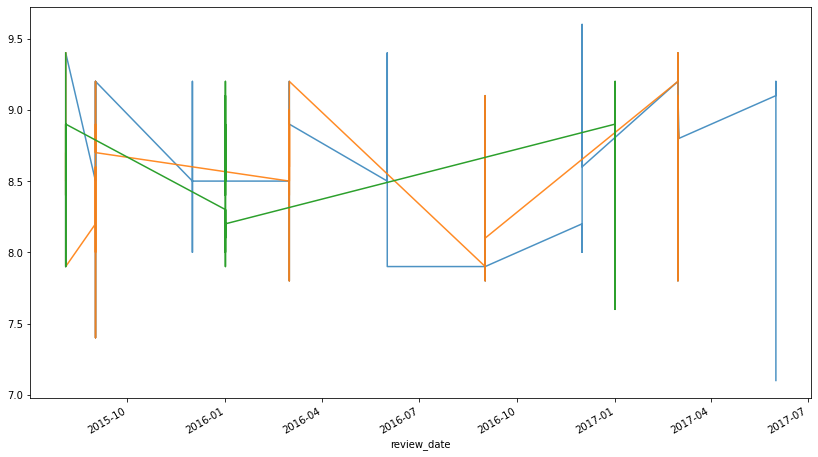

In [51]:
plt.figure(figsize=(14,8))
#barza_df.resample('D').reviewer_score.head(18).sort_values(ascending=False).plot(alpha=.2)
#barza_df.resample('W').reviewer_score.head(18).sort_values(ascending=False).plot(alpha=.4)
#barza_df.resample('M').reviewer_score.head(18).sort_values(ascending=False).plot(alpha=.6)
barza_df.resample('3M').average_score.head(18).sort_values(ascending=False).plot(alpha=.8)
barza_df.resample('6M').average_score.head(18).sort_values(ascending=False).plot(alpha=.9)
barza_df.resample('Y').average_score.head(18).sort_values(ascending=False).plot()
plt.xticks(rotation=30)

In [39]:
barza_df.reviewer_score.mean()

8.55409233736055

In [41]:
barza_df.reviewer_nationality.value_counts().sort_values(ascending=False)

 United Kingdom                           20961
 United States of America                  6169
 Australia                                 2907
 Ireland                                   2134
 Spain                                     1778
 Canada                                    1457
 United Arab Emirates                      1331
 Netherlands                               1232
 Saudi Arabia                              1202
 Israel                                    1173
 Switzerland                               1167
 Germany                                   1102
 France                                    1080
 Turkey                                     820
 Belgium                                    750
 Italy                                      743
 Sweden                                     586
 Romania                                    583
 Kuwait                                     568
 Russia                                     556
 South Africa                           

In [40]:
tstat, pval = stats.ttest_1samp(barza_df[barza_df.reviewer_nationality == 'United Kingdom' ].reviewer_score, barza_df.reviewer_score.mean())

tstat, pval

/opt/homebrew/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/homebrew/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/homebrew/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(nan, nan)

In [58]:
barza_df.head()

,month_name,month,year,day_name,day,quarter,hotel_name,street,city,zip_code,country,lat,lng,additional_number_of_scoring,average_score,total_number_of_reviews,reviewer_nationality,trip_type,nights_stayed,group_type,total_number_of_reviews_reviewer_has_given,reviewer_score,nps_group,days_since_review,neg_sentiment_score,neg_lem_sentiment_score,review_total_negative_word_counts,negative_unique_word_count,pos_sentiment_score,review_total_positive_word_counts,positive_unique_word_count,pos_lem_sentiment_score,negative_review,negative_clean_review,negative_lemma,positive_review,positive_clean_review,positive_lemma
review_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-08-04,August,8,2015,Tuesday,4,3,Gran Hotel Torre Catalunya,Avenida Roma 2 4 Sants Montju c,Barcelona,08014,Spain,41.379557,2.142546,215,8.5,1671,Canada,leisure,1,family with young children,1,10.0,promoter,730,-0.5267,-0.5267,54,44,0.6249,8,6,0.6249,I clearly requested before I booked online I ...,clearly requested booked online required 1 roo...,clearly requested booked online required 1 roo...,Large rooms and bathrooms Great brunch,large rooms bathrooms great brunch,large room bathroom great brunch
2015-08-04,August,8,2015,Tuesday,4,3,Hotel Margot House,Paseo de Gracia 46 Eixample,Barcelona,08007,Spain,41.391880,2.166036,42,9.4,335,United Kingdom,leisure,4,couple,2,10.0,promoter,730,-0.0516,-0.0516,5,3,0.8779,20,17,0.8779,Having to leave,leave,leave,Perfect location The staff were impeccable Th...,perfect location staff impeccable hotel like i...,perfect location staff impeccable hotel like i...
2015-08-04,August,8,2015,Tuesday,4,3,Sansi Pedralbes,Avenida Pearson 1 3 Les Corts,Barcelona,08034,Spain,41.393670,2.111542,23,8.4,274,Ireland,business,3,couple,1,8.8,passive,730,-0.1027,-0.1027,11,10,0.4939,5,4,0.4939,Hard to control temp in room too cold for sle...,hard control temp room cold sleeping,hard control temp room cold sleeping,Friendly and enthuasiatic staff,friendly enthuasiatic staff,friendly enthuasiatic staff
2015-08-04,August,8,2015,Tuesday,4,3,Condes de Barcelona,Paseo de Gracia 73 Eixample,Barcelona,08008,Spain,41.393550,2.162710,163,8.7,1319,Saudi Arabia,leisure,2,couple,1,6.3,detractor,730,0.8271,0.8271,84,60,0.0000,4,3,0.0000,The fridge was closed and we asked them to op...,fridge closed asked open put water said buy th...,fridge closed asked open put water said buy th...,Staff location style,staff location style,staff location style
2015-08-04,August,8,2015,Tuesday,4,3,Exe Laietana Palace,Via Laietana 17 Ciutat Vella,Barcelona,08003,Spain,41.383354,2.179404,177,7.9,2045,Sweden,leisure,5,couple,11,8.5,passive,730,0.0000,0.0000,31,27,0.8910,15,13,0.8910,Small crack in the toilet seat that gave smal...,small crack toilet seat gave small pinches tel...,small crack toilet seat gave small pinch tell ...,Location was great Friendly staff and one gla...,location great friendly staff one glas free ca...,location great friendly staff one glas free ca...


In [77]:
simple_nps = pd.crosstab(df.reviewer_nationality, df.nps_group).sort_values('promoter', ascending=False)
simple_nps['score'] = (simple_nps.promoter - simple_nps.detractor)/(simple_nps.detractor + simple_nps.passive + simple_nps.promoter) * 100
simple_nps.head(18)

nps_group,detractor,passive,promoter,score
reviewer_nationality,,,,
United Kingdom,38373,81723,125150,35.383656
United States of America,4128,9882,21427,48.816209
Australia,2785,7667,11234,38.960620
Ireland,2317,5237,7273,33.425508
Canada,1071,2829,3994,37.028123
United Arab Emirates,2684,3754,3797,10.874450
Israel,821,2008,3781,44.780635
Switzerland,1737,3616,3325,18.299147
Saudi Arabia,2393,3290,3268,9.775444


In [78]:
simple_nps[simple_nps.detractor + simple_nps.passive + simple_nps.promoter >= 500].sort_values('score', ascending=False).head(18)

nps_group,detractor,passive,promoter,score
reviewer_nationality,,,,
United States of America,4128,9882,21427,48.816209
Israel,821,2008,3781,44.780635
New Zealand,344,1186,1707,42.106889
Mexico,90,166,336,41.554054
Australia,2785,7667,11234,38.960620
Canada,1071,2829,3994,37.028123
United Kingdom,38373,81723,125150,35.383656
Hungary,314,799,1072,34.691076
China,514,1226,1660,33.705882


In [79]:
simple_nps.score.mean()

24.050923125624376

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 39 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   review_date                                 515738 non-null  datetime64[ns]
 1   month_name                                  515738 non-null  object        
 2   month                                       515738 non-null  int64         
 3   year                                        515738 non-null  int64         
 4   day_name                                    515738 non-null  object        
 5   day                                         515738 non-null  int64         
 6   quarter                                     515738 non-null  int64         
 7   hotel_name                                  515738 non-null  object        
 8   street                                      515738 non-null  object       

In [61]:
df.group_type.value_counts()

couple                        252294
solo traveler                 108545
group                          65392
family with young children     61015
family with older children     26349
travelers with friends          2143
Name: group_type, dtype: int64

In [95]:
solo_traveler_sentiment = df[df.group_type == 'solo traveler'].pos_lem_sentiment_score
fam_young_kids_sentiment = df[df.group_type == 'family with young children'].pos_lem_sentiment_score

print(f'Solo traveler average positive sentiment score:\n{solo_traveler_sentiment}')
print(f'Families with young children average positive sentiment score:\n{fam_young_kids_sentiment}')


Solo traveler average positive sentiment score:
4         0.7964
5         0.4404
10        0.5859
34        0.8773
39        0.8834
           ...  
515691    0.7703
515711    0.9552
515716   -0.6597
515727    0.7351
515731    0.0000
Name: pos_lem_sentiment_score, Length: 108545, dtype: float64
Families with young children average positive sentiment score:
2         0.7579
20        0.6249
48        0.4404
62        0.9274
74        0.0000
           ...  
515721    0.8271
515728    0.4404
515729    0.0000
515733    0.7506
515734    0.7906
Name: pos_lem_sentiment_score, Length: 61015, dtype: float64


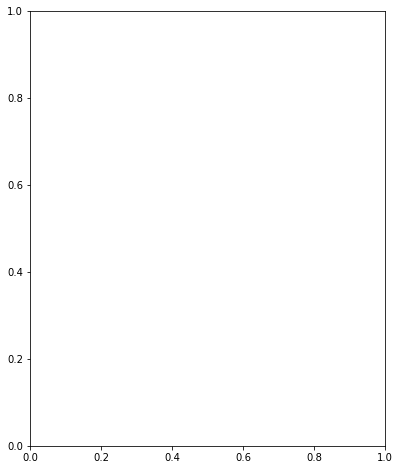

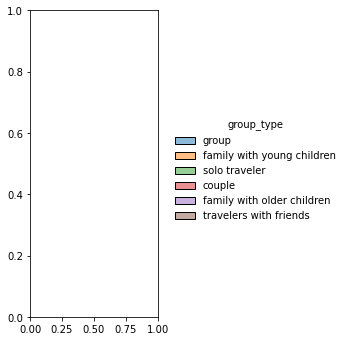

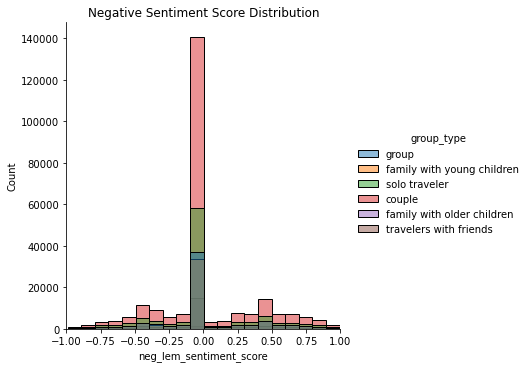

<AxesSubplot:xlabel='group_type', ylabel='pos_lem_sentiment_score'>

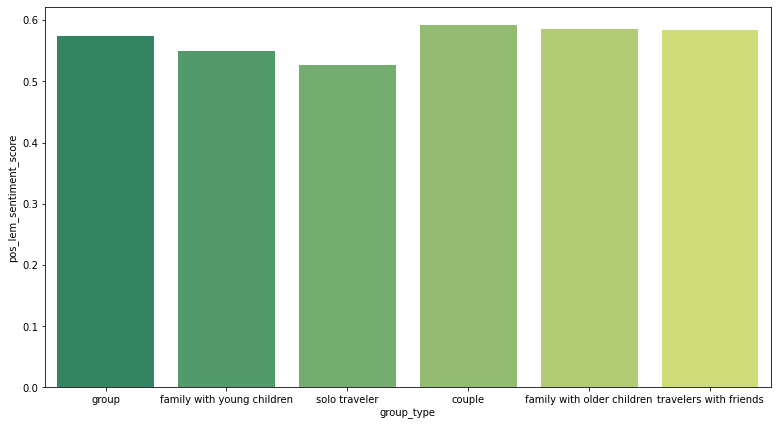

In [97]:
plt.figure(figsize=(14,8))
plt.subplot(121)
sns.displot(data=df, x='pos_lem_sentiment_score', hue='group_type')
plt.xlim(-1,1)
plt.title('Positive Sentiment Score Distribution')


plt.subplot(122)
sns.displot(data=df, x='neg_lem_sentiment_score', hue='group_type')
plt.xlim(-1,1)
plt.title('Negative Sentiment Score Distribution')


plt.show()

plt.figure(figsize=(13,7))
sns.barplot(data=df, x='group_type', y='pos_lem_sentiment_score', ci=False, palette='summer')

### $H_0$: Solo travelers' average positive sentiment scores are the same as other groups' average positive sentiment scores.

### $H_a$: Solo travelers' average positive sentiment score differ from other groups' average positive sentiment scores.

In [67]:
alpha = .05
tstat, pval = stats.ttest_1samp(solo_traveler_sentiment, df.pos_lem_sentiment_score.mean())

if tstat > 0 and pval/2 > alpha:
    print('We can reject the null hypothesis.')
else:
    print(f'We fail to reject the null hypothesis.\nTest statistic: {tstat}\nP-value/2: {pval/2}')

We fail to reject the null hypothesis.
Test statistic: -38.80930912617429
P-value/2: 0.0


In [64]:
df.pos_lem_sentiment_score.mean()

0.5704842295897984

### $H_0$: Families with young children average positive sentiment scores are the same as other groups' average positive sentiment scores.

### $H_a$: Families with young children average positive sentiment score differ from other groups' average positive sentiment scores.

In [69]:
tstat, pval = stats.ttest_1samp(fam_young_kids_sentiment, df.pos_lem_sentiment_score.mean())

if tstat > 0 and pval/2 > alpha:
    print('We can reject the null hypothesis.')
else:
    print(f'We fail to reject the null hypothesis.\nTest statistic: {tstat}\nP-value/2: {pval/2}')

We fail to reject the null hypothesis.
Test statistic: -14.154608921743163
P-value/2: 1.0322025933987674e-45


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'couple'),
  Text(1, 0, 'family with older children'),
  Text(2, 0, 'family with young children'),
  Text(3, 0, 'group'),
  Text(4, 0, 'solo traveler'),
  Text(5, 0, 'travelers with friends')])

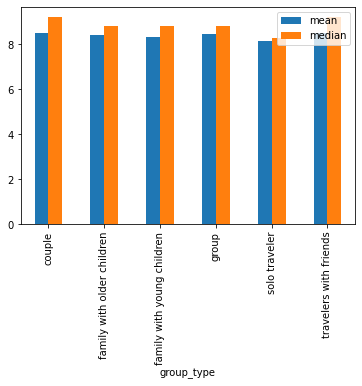

In [90]:
df.groupby('group_type').reviewer_score.agg(['mean', 'median']).plot.bar()
plt.xticks(rotation=90)

<AxesSubplot:xlabel='nps_group'>

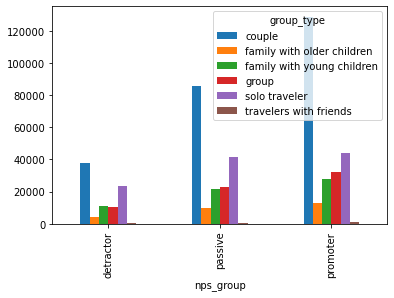

In [91]:
#plt.figure(figsize=(20,12))
pd.crosstab(df.nps_group, df.group_type).plot.bar()

In [93]:
random_thousand = df.sample(1000)
random_thousand.to_csv('random_thousand.csv')